In [58]:
from qiskit import *
import numpy as np
import matplotlib as mpl
from qiskit.tools.visualization import plot_histogram, plot_state_city

state_sim = Aer.get_backend('statevector_simulator')
qasm_sim = Aer.get_backend('qasm_simulator')
unitary_sim = Aer.get_backend('unitary_simulator')

In [59]:
def increment(qc,qr):
    for i in range(num_qubits - 1):
        qc.mct(qr[0:num_qubits - 1 - i], 
               qr[num_qubits - 1 - i] , 
               qr_aux)
        
def decrement(qc,qr):
    for i in range(num_qubits - 1):
        qc.mct(qr[0:i+1], 
               qr[i+1], 
               qr_aux)


def quantum_walk(qc,qr,num_steps):
    for i in range(num_steps):
        # qubit coin on which the hadamard gate was applied
        qc.h(qr[0])
        
        #shift right
        increment(qc,qr)
        
        #shift left
        qc.x(qr[0])
        decrement(qc,qr)
        
        # back to original state
        qc.x(qr[0])
        
        qc.barrier()

In [41]:
## PARAMETERS: number of qubits and steps
num_qubits = 4
num_steps = 1

In [42]:
##Define qRegister and cRegister
qr = QuantumRegister(num_qubits, 'qr')
# We don't want to measure the coin operator
cr = ClassicalRegister(num_qubits - 1, 'cr')

#Define qCircuit
# We need (num_control - 3) aux qubits for mct 
# An auxiliary qubit for every qubit (except coin)
if num_qubits > 3:
    qr_aux = QuantumRegister(num_qubits - 3, 'aux')
    qc = QuantumCircuit(qr,qr_aux,cr)
else:
    qr_aux = None
    qc = QuantumCircuit(qr,cr)

In [43]:
## Initialization of the nodes
qc.x(qr[num_qubits-1]) # Initial state= 100000...
qc.barrier()

In [44]:
# Repeat the quantum walk for num_steps
quantum_walk(qc, qr, num_steps)

## Measure the node qubits
qc.measure(qr[1:num_qubits],cr)

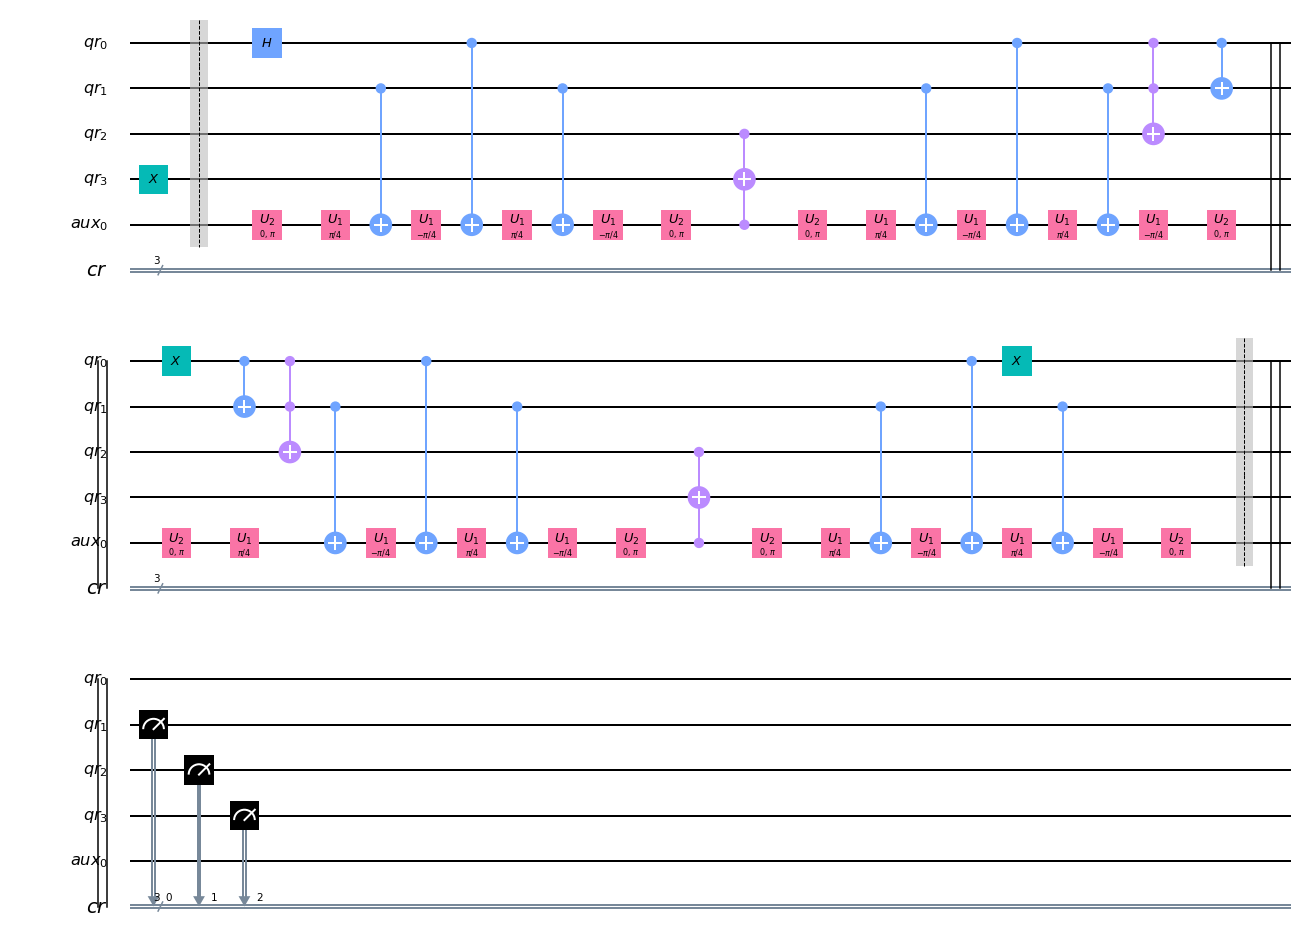

In [45]:
qc.draw(output='mpl')

In [46]:
job = execute (qc, backend = qasm_sim)
shots = job.result().get_counts()

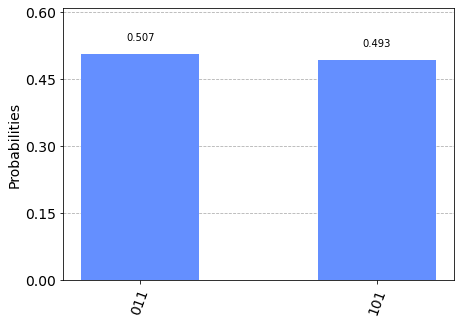

In [47]:
plot_histogram(shots)

In [60]:
## PARAMETERS: number of qubits and steps
num_qubits = 8
num_steps = 30

In [61]:
##Define qRegister and cRegister
qr = QuantumRegister(num_qubits, 'qr')
# We don't want to measure the coin operator
cr = ClassicalRegister(num_qubits - 1, 'cr')

#Define qCircuit
# We need (num_control - 3) aux qubits for mct 
# An auxiliary qubit for every qubit (except coin)
if num_qubits > 3:
    qr_aux = QuantumRegister(num_qubits - 3, 'aux')
    qc = QuantumCircuit(qr,qr_aux,cr)
else:
    qr_aux = None
    qc = QuantumCircuit(qr,cr)

In [50]:
## Initialization of the nodes
qc.x(qr[num_qubits-1]) # Initial state= 100000...
qc.barrier()

In [51]:
# Repeat the quantum walk for num_steps
quantum_walk(qc, qr, num_steps)

## Measure the node qubits
qc.measure(qr[1:num_qubits],cr)

In [52]:
job = execute (qc, backend = qasm_sim)
shots = job.result().get_counts()

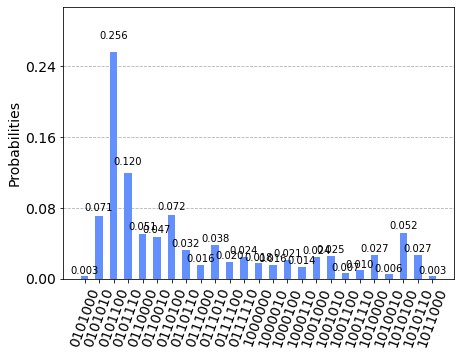

In [53]:
plot_histogram(shots)

In [62]:
# To resolve left 
qc.x(qr[num_qubits-1]) # Initial state= 100000...
qc.barrier()

## Inizialization of the coin 1/sqrt[2] (1, i)
qc.h(qr[0])
qc.s(qr[0])

In [63]:
# Repeat the quantum walk for num_steps
quantum_walk(qc, qr, num_steps)

## Measure the node qubits
qc.measure(qr[1:num_qubits],cr)

In [64]:
job = execute (qc, backend = qasm_sim)
shots = job.result().get_counts()

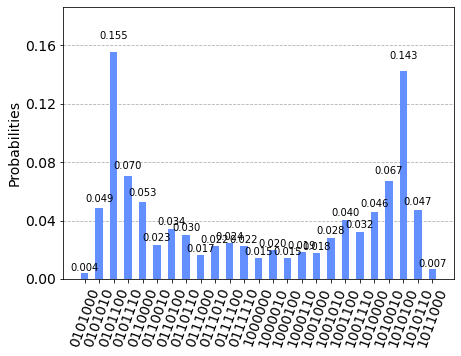

In [65]:
plot_histogram(shots)